In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("https://raw.githubusercontent.com/psantul/Dataset/main/data.csv", encoding='latin-1')
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
del data['Unnamed: 32']

In [15]:
x = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [16]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
acc_list = []
hid = [64,128,256,512]
class NeuralNetwork:
    
    def __init__(self,X, y, X_test, y_test, hidden_nodes=12, learning_rate=0.1, epochs=5000):
        
        #data
        self.y = y[:,None]
        self.X = X
        
        self.X_test = X_test
        self.y_test = y_test

        for x in hid:
          hidden_nodes = x
          np.random.seed(4)
          self.input_nodes = len(X[0])
          self.hidden_nodes = hidden_nodes
          self.output_nodes = self.y.shape[1]
          self.learning_rate = learning_rate
        
          #init weights
          self.w1 = 2*np.random.random((self.input_nodes, self.hidden_nodes)) - 1
          self.w2 = 2*np.random.random((self.hidden_nodes, self.output_nodes)) - 1

          self.train(epochs)
          self.test()


        """#parameters
        np.random.seed(4)
        self.input_nodes = len(X[0])
        self.hidden_nodes = hidden_nodes
        self.output_nodes = self.y.shape[1]
        self.learning_rate = learning_rate
        
        #init weights
        self.w1 = 2*np.random.random((self.input_nodes, self.hidden_nodes)) - 1
        self.w2 = 2*np.random.random((self.hidden_nodes, self.output_nodes)) - 1

        self.train(epochs)
        self.test()"""
        
    def sigmoid(self,X):
        return (1/(1+np.exp(-X)))

    def sigmoid_prime(self,X):
        return X * (1 - X)
        
    def train(self, epochs):
        
        for e in range(epochs):
            
            #FORWARD PROPAGATION
            
            #hidden layer
            # W1(398,30) X(30,12)
            l1 = self.sigmoid(np.dot(self.X, self.w1))

            #output layer
            #l1(398,12) W2(12,1)
            l2 = self.sigmoid(np.dot(l1, self.w2))
        
            # BACKPROPAGATION
            
            #calculate how far off our prediciton was
            error = self.y-l2
            
            #calculate how far off each layer is
            l2_delta = error * self.sigmoid_prime(l2)
            l1_delta = l2_delta.dot(self.w2.T) * self.sigmoid_prime(l1)

            #update weights with our newly found error values
            self.w2 = np.add(self.w2, l1.T.dot(l2_delta) * self.learning_rate)
            self.w1 = np.add(self.w1, self.X.T.dot(l1_delta) * self.learning_rate)
        
        #print('Error:', (abs(error)).mean())
    
    def test(self):
        correct = 0
        pred_list = []
        
        #replicate feedforward network for testing
        l1 = self.sigmoid(np.dot(self.X_test, self.w1))
        l2 = self.sigmoid(np.dot(l1, self.w2))
        
        #loop through all of the outputs of layer 2
        for i in range(len(l2)):
            if l2[i] >= 0.5:
                pred = 1
            else:
                pred = 0

            if pred == self.y_test[i]:
                correct += 1
                
            pred_list.append(pred)
        print("Predicted Values Are :")
        print(pred_list)
        print("Actual Values Are :")
        print(y_test)
        correct = np.sum(pred_list == y_test)
        print("%d out of %d predictions correct" % (correct, len(pred_list)))

        print("Test Accuracy: ", ((correct/len(y_test))*100),'%')
        acc_list.append((correct/len(y_test))*100)
        

In [20]:
print(hid)

[64, 128, 256, 512]


In [21]:
nn = NeuralNetwork(X_train, y_train, X_test, y_test)
print(acc_list)

Predicted Values Are :
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]
Actual Values Are :
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
164 out of 171 predictions correct
Test Accuracy:  95.90643274853801 %
Predicted Values Are :
[

In [22]:
print(acc_list)

[95.90643274853801, 63.1578947368421, 96.49122807017544, 97.07602339181285]


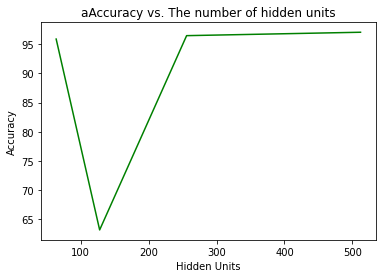

In [23]:
plt.title("aAccuracy vs. The number of hidden units") 
plt.xlabel("Hidden Units") 
plt.ylabel("Accuracy") 
plt.plot(hid,acc_list, color ="green") 
plt.show()